In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [10]:
df=pd.read_csv("student_data.csv")
df.head()

,Student_ID,Attendance,AssignmentScore,ExamScore
0,S1,88,92,94
1,S2,78,41,75
2,S3,64,59,63
3,S4,92,67,49
4,S5,57,86,79


In [11]:
X = df[["Attendance","AssignmentScore","ExamScore"]]

In [12]:
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

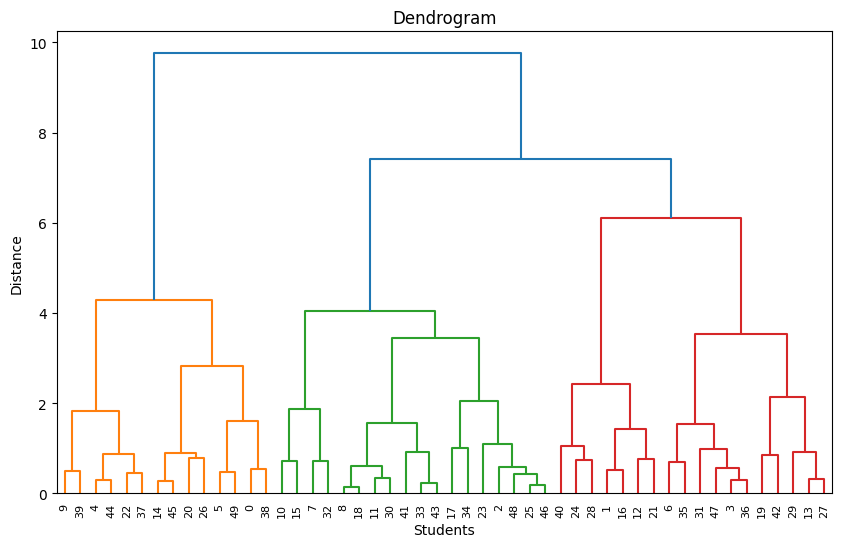

In [16]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10,6 ))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()

In [18]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)
df['Cluster'] = labels
df.head()

,Student_ID,Attendance,AssignmentScore,ExamScore,Cluster
0,S1,88,92,94,1
1,S2,78,41,75,0
2,S3,64,59,63,2
3,S4,92,67,49,0
4,S5,57,86,79,1


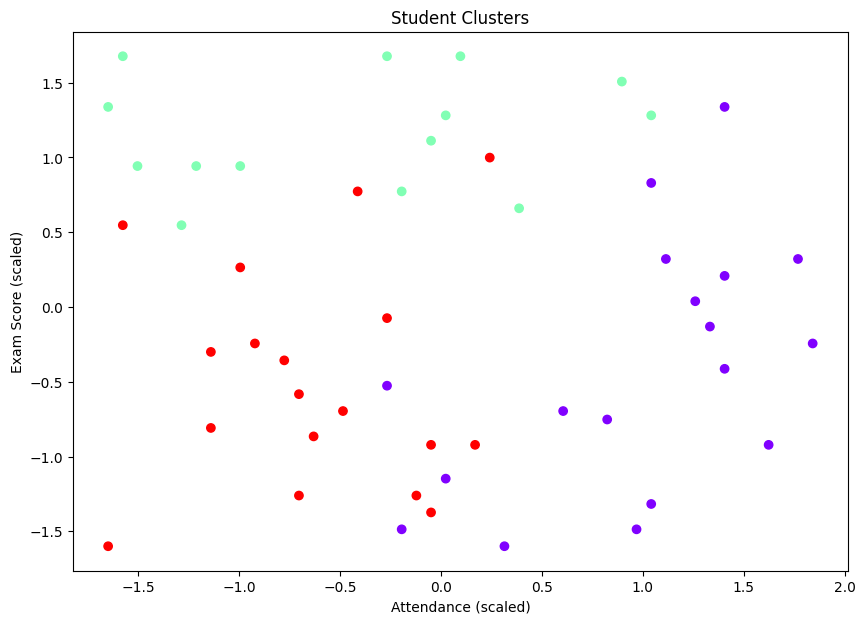

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title("Student Clusters")
plt.xlabel("Attendance (scaled)")
plt.ylabel("Exam Score (scaled)")
plt.show()